In [3]:
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os
 

In [4]:
imageSize=(224,224)
batchSize=32

In [5]:
trainDataset=image_dataset_from_directory(r"D:\DATASET\Data Main\train",seed=42,image_size=imageSize)
valDataset=image_dataset_from_directory(r"D:\DATASET\Data Main\val",seed=42,image_size=imageSize)
testDataset=image_dataset_from_directory(r"D:\DATASET\Data Main\test",seed=42,image_size=imageSize)

Found 31571 files belonging to 4 classes.
Found 6765 files belonging to 4 classes.
Found 6769 files belonging to 4 classes.


In [6]:
class_name=valDataset.class_names
print(class_name)

['Grassy', 'Marshy', 'Rocky', 'Sandy']


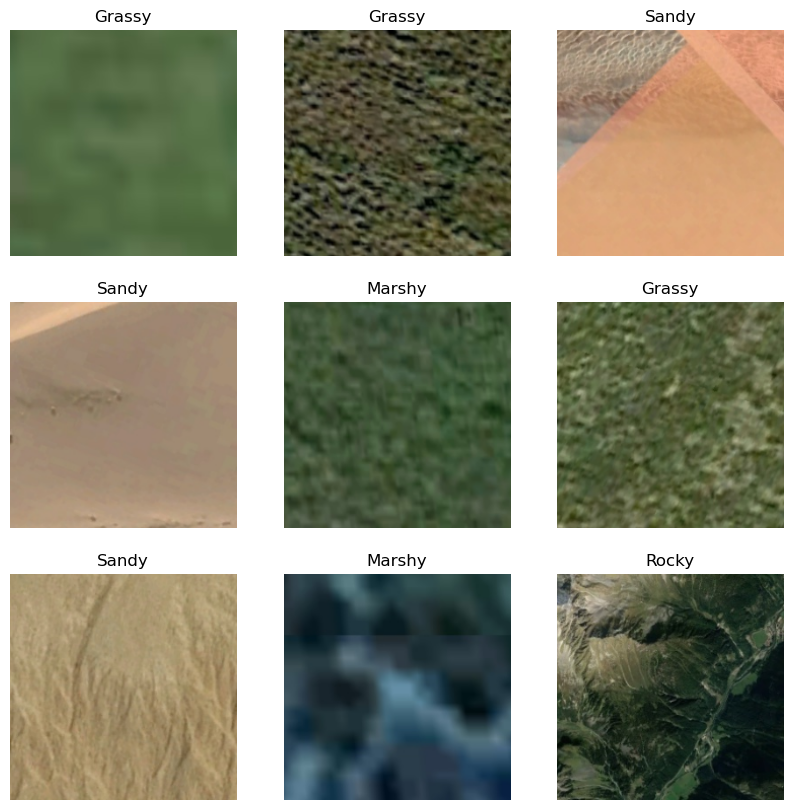

In [7]:
plt.figure(figsize=(10,10))
for images,labels in trainDataset.take(1):
    for i in range(9):
        axis=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_name[labels[i]])
        plt.axis("off")

Epoch 1/5


D:\anaconda\Lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


987/987 [==============================] - 532s 538ms/step - loss: 0.4095 - accuracy: 0.8389 - val_loss: 0.2544 - val_accuracy: 0.9138
Epoch 2/5
987/987 [==============================] - 526s 533ms/step - loss: 0.2349 - accuracy: 0.9138 - val_loss: 0.1848 - val_accuracy: 0.9364
Epoch 3/5
987/987 [==============================] - 525s 532ms/step - loss: 0.1739 - accuracy: 0.9382 - val_loss: 0.1409 - val_accuracy: 0.9512
Epoch 4/5
987/987 [==============================] - 525s 531ms/step - loss: 0.1322 - accuracy: 0.9532 - val_loss: 0.2468 - val_accuracy: 0.9276
Epoch 5/5
987/987 [==============================] - 529s 536ms/step - loss: 0.1158 - accuracy: 0.9596 - val_loss: 0.1607 - val_accuracy: 0.9462


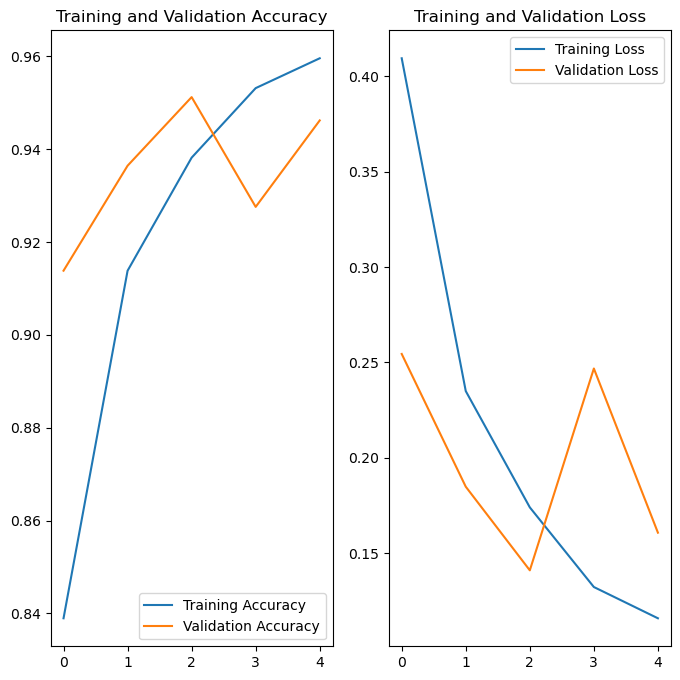

In [8]:
num_classes = 4

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=imageSize),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes,activation='softmax')
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])
epochs=5
history = model.fit(
  trainDataset,
  validation_data=valDataset,
  epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        9

In [14]:
predictions=model.predict(testDataset)

212/212 [==============================] - 29s 134ms/step


In [15]:
testAccuracy,testLoss=model.evaluate(testDataset)

212/212 [==============================] - 29s 135ms/step - loss: 0.1485 - accuracy: 0.9487


In [16]:
print(testAccuracy)
print(testLoss)

0.1484988033771515
0.9487369060516357


In [17]:
import joblib

In [18]:
joblib.dump(model,"terrain.pkl")

['terrain.pkl']

In [19]:
modelNew=joblib.load("terrain.pkl")

In [20]:
modelNew.evaluate(testDataset)

212/212 [==============================] - 29s 137ms/step - loss: 0.1485 - accuracy: 0.9487


[0.14849884808063507, 0.9487369060516357]

In [47]:
testImage=image_dataset_from_directory(r"C:\newTest2",seed=42,image_size=imageSize)

Found 1 files belonging to 1 classes.


In [48]:
index=modelNew.predict(testImage)
print(index)

predictedClass=class_name[np.argmax(index)]
score=np.max(index[0])
print(predictedClass)
print(f"Prediction: {predictedClass} with Confidence of {(100*np.max(score))} percent",)


1/1 [==============================] - 0s 39ms/step
[[1.8440919e-09 9.2220667e-04 1.9228743e-01 8.0679029e-01]]
Sandy
Prediction: Sandy with Confidence of 80.6790292263031 percent


In [43]:
pass

In [100]:
pass